# Figures for Article

This notebook generates all figures for the article using the combined participants data from both Study 1 and Study 2.


## Imports and Configuration

Import necessary libraries for data manipulation and figure creation. Set up display options and plotting style.


In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings

# Ignore warnings - for cleaner output
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10


## Data Loading

Load the combined participants file for both Study 1 and Study 2. Handle exclusions and prepare dataframes for figure creation.


In [10]:
# Define paths
BASE_DIR = Path('..')
DATA_DIR = BASE_DIR / "data"

# Load the combined participants file (CSV has single header row)
combined_file = DATA_DIR / "combined_participants_S1&S2.csv"
df_all = pd.read_csv(combined_file)

print(f"Total participants in combined file: {len(df_all)}")

# Convert key columns to appropriate types
df_all['id'] = df_all['id'].astype(str)
df_all['study'] = df_all['study'].astype(str)
df_all['task'] = df_all['task'].astype(str)
df_all['group'] = pd.to_numeric(df_all['group'], errors='coerce')

# Handle exclusions
# The 'exclude' column indicates if participant should be excluded from entire study
if 'exclude' in df_all.columns:
    # Check what values indicate exclusion (likely True/1 for excluded)
    print(f"\nExclusion column value counts:")
    print(df_all['exclude'].value_counts())
    
    # Filter out excluded participants
    # Assuming True, 1, or 'True' means excluded
    df_all_included = df_all[~df_all['exclude'].astype(str).str.upper().isin(['TRUE', '1', 'YES'])].copy()
    print(f"Participants after exclusions: {len(df_all_included)}")
else:
    print("Warning: 'exclude' column not found. Using all participants.")
    df_all_included = df_all.copy()

# Separate by study for convenience
df_s1 = df_all_included[df_all_included['study'].astype(str).str.upper().isin(['S1', '1'])].copy()
df_s2 = df_all_included[df_all_included['study'].astype(str).str.upper().isin(['S2', '2'])].copy()

print(f"\nStudy 1 participants (after exclusions): {len(df_s1)}")
print(f"Study 2 participants (after exclusions): {len(df_s2)}")

# Check group distribution for both studies
print(f"\nStudy 1 group distribution:")
print(df_s1['group'].value_counts().sort_index())
print(f"\nStudy 2 group distribution:")
print(df_s2['group'].value_counts().sort_index())
print("(0 = Control, 1 = Faking Low/Introversion, 2 = Faking High/Extraversion)")

# Check task distribution
print(f"\nStudy 1 task distribution:")
print(df_s1['task'].value_counts())
print(f"\nStudy 2 task distribution:")
print(df_s2['task'].value_counts())

# Store dataframes for use in figures
# Main dataframe with all included participants
df = df_all_included.copy()

# Study-specific dataframes
df_s1_fig = df_s1.copy()
df_s2_fig = df_s2.copy()

print(f"\nDataframes ready for figure creation:")
print(f"  df: All participants (N = {len(df)})")
print(f"  df_s1_fig: Study 1 participants (N = {len(df_s1_fig)})")
print(f"  df_s2_fig: Study 2 participants (N = {len(df_s2_fig)})")


Total participants in combined file: 898

Exclusion column value counts:
exclude
0    787
1    111
Name: count, dtype: int64
Participants after exclusions: 787

Study 1 participants (after exclusions): 259
Study 2 participants (after exclusions): 528

Study 1 group distribution:
group
0    89
1    85
2    85
Name: count, dtype: int64

Study 2 group distribution:
group
0    181
1    169
2    178
Name: count, dtype: int64
(0 = Control, 1 = Faking Low/Introversion, 2 = Faking High/Extraversion)

Study 1 task distribution:
task
IAT     140
qIAT    119
Name: count, dtype: int64

Study 2 task distribution:
task
qIAT    267
IAT     261
Name: count, dtype: int64

Dataframes ready for figure creation:
  df: All participants (N = 787)
  df_s1_fig: Study 1 participants (N = 259)
  df_s2_fig: Study 2 participants (N = 528)


## Figure 2: Implicit-Explicit Correlations at Time 1 (Study 1)

Scatter plot showing correlations between implicit measures (IAT and qIAT) and explicit questionnaire scores at Time 1 in Study 1. Includes regression lines for both groups.


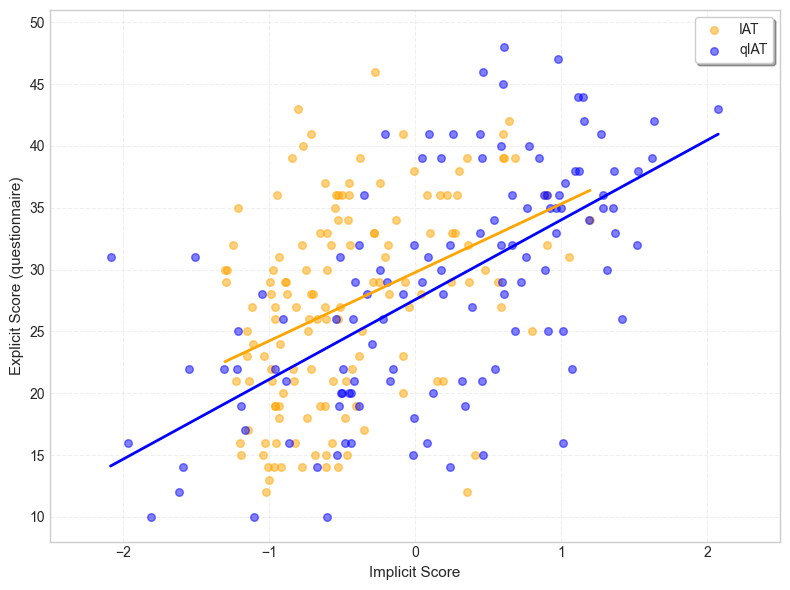

Correlation Statistics:
IAT: r = 0.391, p = 0.0000, n = 140
qIAT: r = 0.616, p = 0.0000, n = 119


In [11]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Filter to Study 1, Time 1 data
df_s1_t1 = df_s1_fig.copy()

# Prepare IAT data (WT = IAT)
iat_data = df_s1_t1[df_s1_t1['task'].str.upper() == 'IAT'].copy()
iat_implicit = pd.to_numeric(iat_data['t1_dscore'], errors='coerce')
iat_explicit = pd.to_numeric(iat_data['t1_ques'], errors='coerce')

# Remove missing values
iat_pairs = pd.DataFrame({
    'implicit': iat_implicit,
    'explicit': iat_explicit
}).dropna()

# Prepare qIAT data
qiat_data = df_s1_t1[df_s1_t1['task'].str.upper() == 'QIAT'].copy()
qiat_implicit = pd.to_numeric(qiat_data['t1_dscore'], errors='coerce')
qiat_explicit = pd.to_numeric(qiat_data['t1_ques'], errors='coerce')

# Remove missing values
qiat_pairs = pd.DataFrame({
    'implicit': qiat_implicit,
    'explicit': qiat_explicit
}).dropna()

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot IAT (WT) - orange
ax.scatter(iat_pairs['implicit'], iat_pairs['explicit'], 
           alpha=0.5, color='orange', s=30, label='IAT')

# Plot qIAT - blue
ax.scatter(qiat_pairs['implicit'], qiat_pairs['explicit'], 
           alpha=0.5, color='blue', s=30, label='qIAT')

# Add regression lines
# IAT regression
if len(iat_pairs) > 1:
    x_iat = iat_pairs['implicit'].values.reshape(-1, 1)
    y_iat = iat_pairs['explicit'].values
    reg_iat = LinearRegression().fit(x_iat, y_iat)
    x_line_iat = np.linspace(iat_pairs['implicit'].min(), iat_pairs['implicit'].max(), 100)
    y_line_iat = reg_iat.predict(x_line_iat.reshape(-1, 1))
    ax.plot(x_line_iat, y_line_iat, color='orange', linewidth=2, label='_nolegend_')

# qIAT regression
if len(qiat_pairs) > 1:
    x_qiat = qiat_pairs['implicit'].values.reshape(-1, 1)
    y_qiat = qiat_pairs['explicit'].values
    reg_qiat = LinearRegression().fit(x_qiat, y_qiat)
    x_line_qiat = np.linspace(qiat_pairs['implicit'].min(), qiat_pairs['implicit'].max(), 100)
    y_line_qiat = reg_qiat.predict(x_line_qiat.reshape(-1, 1))
    ax.plot(x_line_qiat, y_line_qiat, color='blue', linewidth=2, label='_nolegend_')

# Labels and formatting
ax.set_xlabel('Implicit Score', fontsize=11)
ax.set_ylabel('Explicit Score (questionnaire)', fontsize=11)
# ax.set_title('Figure 2. The correlations between the two implicit measures (IAT and qIAT) and the explicit measure at Time1 in Study 1.', 
#              fontsize=11, pad=10)

# Set axis limits to match the figure
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(8, 51)

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

# Legend
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Print correlation statistics
print("Correlation Statistics:")
if len(iat_pairs) > 1:
    iat_corr, iat_p = pearsonr(iat_pairs['implicit'], iat_pairs['explicit'])
    print(f"IAT: r = {iat_corr:.3f}, p = {iat_p:.4f}, n = {len(iat_pairs)}")
if len(qiat_pairs) > 1:
    qiat_corr, qiat_p = pearsonr(qiat_pairs['implicit'], qiat_pairs['explicit'])
    print(f"qIAT: r = {qiat_corr:.3f}, p = {qiat_p:.4f}, n = {len(qiat_pairs)}")


## Figure 3: Mean Normalized Score Differences (Time 2 - Time 1) by Group (Study 1)

Grouped bar chart showing mean differences between normalized Time 2 and Time 1 scores for self-report (Questionnaire), IAT, and qIAT across the three experimental conditions (Control, Faking Low, Faking High) in Study 1.


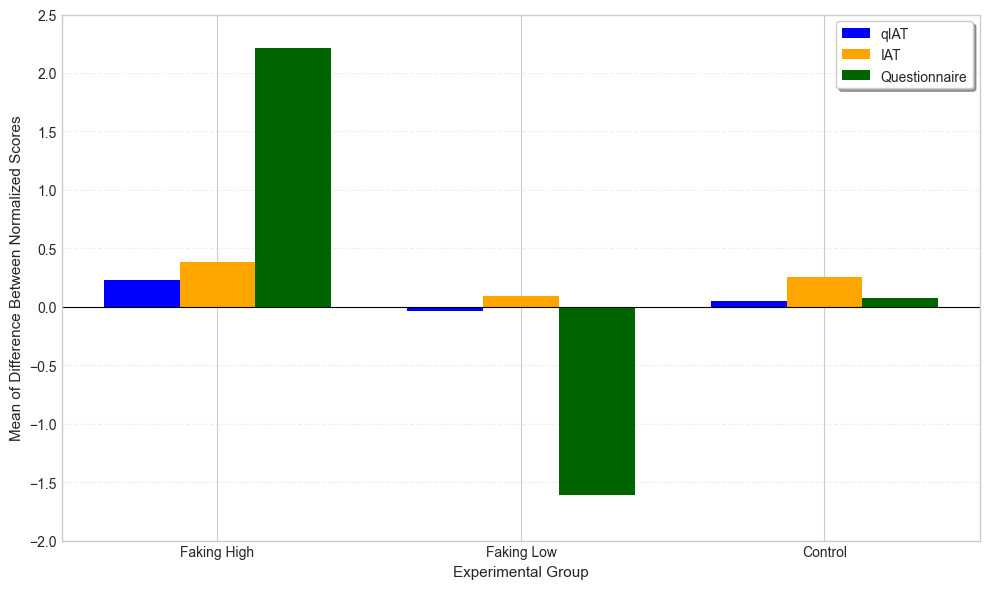


Mean Differences (T2_norm - T1_norm) by Group and Measure:
Measure       qIAT    IAT  Questionnaire
Group                                   
Faking High  0.231  0.386          2.211
Faking Low  -0.040  0.091         -1.610
Control      0.051  0.253          0.075


In [12]:
# Filter to Study 1
df_s1_fig3 = df_s1_fig.copy()

# Group mapping (0 = Control, 1 = Faking Low, 2 = Faking High)
group_names = {0: 'Control', 1: 'Faking Low', 2: 'Faking High'}

# Prepare data for plotting
# We need to compute normalized differences (T2_norm - T1_norm) for each measure

# 1. Questionnaire: Compute normalized scores using T1 baseline
t1_ques_all = pd.to_numeric(df_s1_fig3['t1_ques'], errors='coerce').dropna()
t1_ques_mean = t1_ques_all.mean()
t1_ques_sd = t1_ques_all.std(ddof=1)

df_s1_fig3['t1_ques_norm'] = (pd.to_numeric(df_s1_fig3['t1_ques'], errors='coerce') - t1_ques_mean) / t1_ques_sd
df_s1_fig3['t2_ques_norm'] = (pd.to_numeric(df_s1_fig3['t2_ques'], errors='coerce') - t1_ques_mean) / t1_ques_sd
df_s1_fig3['ques_diff'] = df_s1_fig3['t2_ques_norm'] - df_s1_fig3['t1_ques_norm']

# 2. IAT: Use normalized D-scores (t1_com_d_norm and t2_com_d_norm)
iat_data = df_s1_fig3[df_s1_fig3['task'].str.upper() == 'IAT'].copy()
iat_data['iat_diff'] = (pd.to_numeric(iat_data['t2_com_d_norm'], errors='coerce') - 
                        pd.to_numeric(iat_data['t1_com_d_norm'], errors='coerce'))

# 3. qIAT: Use normalized D-scores (t1_com_d_norm and t2_com_d_norm)
qiat_data = df_s1_fig3[df_s1_fig3['task'].str.upper() == 'QIAT'].copy()
qiat_data['qiat_diff'] = (pd.to_numeric(qiat_data['t2_com_d_norm'], errors='coerce') - 
                          pd.to_numeric(qiat_data['t1_com_d_norm'], errors='coerce'))

# Compute means for each group and measure
results = []

for group_num, group_name in group_names.items():
    # Questionnaire (all participants have questionnaire data)
    ques_group = df_s1_fig3[df_s1_fig3['group'] == group_num].copy()
    ques_diff_mean = ques_group['ques_diff'].dropna().mean()
    results.append({
        'Group': group_name,
        'Measure': 'Questionnaire',
        'Mean_Diff': ques_diff_mean
    })
    
    # IAT (only participants with IAT task)
    iat_group = iat_data[iat_data['group'] == group_num].copy()
    if len(iat_group) > 0:
        iat_diff_mean = iat_group['iat_diff'].dropna().mean()
        results.append({
            'Group': group_name,
            'Measure': 'IAT',
            'Mean_Diff': iat_diff_mean
        })
    
    # qIAT (only participants with qIAT task)
    qiat_group = qiat_data[qiat_data['group'] == group_num].copy()
    if len(qiat_group) > 0:
        qiat_diff_mean = qiat_group['qiat_diff'].dropna().mean()
        results.append({
            'Group': group_name,
            'Measure': 'qIAT',
            'Mean_Diff': qiat_diff_mean
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Pivot for easier plotting
pivot_df = results_df.pivot(index='Group', columns='Measure', values='Mean_Diff')
# Reorder columns: qIAT, IAT, Questionnaire
pivot_df = pivot_df[['qIAT', 'IAT', 'Questionnaire']]
# Reorder rows: Faking High, Faking Low, Control (as requested)
pivot_df = pivot_df.reindex(['Faking High', 'Faking Low', 'Control'])

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and positions
x = np.arange(len(pivot_df.index))  # Group positions
width = 0.25  # Width of bars

# Define colors: qIAT (blue), IAT (orange), Questionnaire (dark green)
colors = {'qIAT': 'blue', 'IAT': 'orange', 'Questionnaire': 'darkgreen'}

# Plot bars
bars1 = ax.bar(x - width, pivot_df['qIAT'], width, label='qIAT', color=colors['qIAT'])
bars2 = ax.bar(x, pivot_df['IAT'], width, label='IAT', color=colors['IAT'])
bars3 = ax.bar(x + width, pivot_df['Questionnaire'], width, label='Questionnaire', color=colors['Questionnaire'])

# Labels and formatting
ax.set_xlabel('Experimental Group', fontsize=11)
ax.set_ylabel('Mean of Difference Between Normalized Scores', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.set_ylim(-2, 2.5)

# Grid
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.axhline(y=0, color='black', linewidth=0.8)

# Legend
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("\nMean Differences (T2_norm - T1_norm) by Group and Measure:")
print(pivot_df.round(3))


## Figure 4 (Study 2): Implicit-Explicit Correlations at Time 1

Scatter plot showing correlations between implicit measures (IAT and qIAT) and explicit questionnaire scores at Time 1 in Study 2. Includes regression lines for both groups.


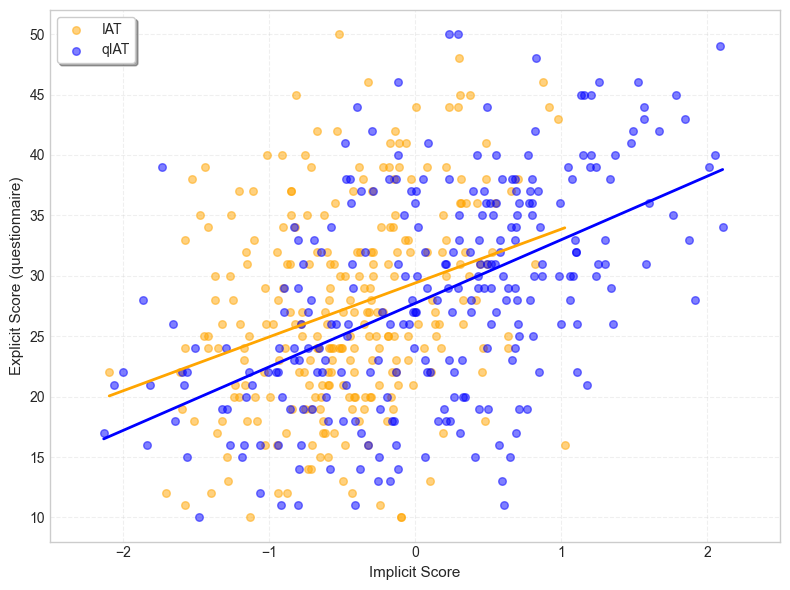

Correlation Statistics (Study 2):
IAT: r = 0.305, p = 0.0000, n = 261
qIAT: r = 0.520, p = 0.0000, n = 267


In [13]:
# Filter to Study 2, Time 1 data
df_s2_t1 = df_s2_fig.copy()

# Prepare IAT data
iat_data = df_s2_t1[df_s2_t1['task'].str.upper() == 'IAT'].copy()
iat_implicit = pd.to_numeric(iat_data['t1_dscore'], errors='coerce')
iat_explicit = pd.to_numeric(iat_data['t1_ques'], errors='coerce')

# Remove missing values
iat_pairs = pd.DataFrame({
    'implicit': iat_implicit,
    'explicit': iat_explicit
}).dropna()

# Prepare qIAT data
qiat_data = df_s2_t1[df_s2_t1['task'].str.upper() == 'QIAT'].copy()
qiat_implicit = pd.to_numeric(qiat_data['t1_dscore'], errors='coerce')
qiat_explicit = pd.to_numeric(qiat_data['t1_ques'], errors='coerce')

# Remove missing values
qiat_pairs = pd.DataFrame({
    'implicit': qiat_implicit,
    'explicit': qiat_explicit
}).dropna()

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot IAT - orange
ax.scatter(iat_pairs['implicit'], iat_pairs['explicit'], 
           alpha=0.5, color='orange', s=30, label='IAT')

# Plot qIAT - blue
ax.scatter(qiat_pairs['implicit'], qiat_pairs['explicit'], 
           alpha=0.5, color='blue', s=30, label='qIAT')

# Add regression lines
# IAT regression
if len(iat_pairs) > 1:
    x_iat = iat_pairs['implicit'].values.reshape(-1, 1)
    y_iat = iat_pairs['explicit'].values
    reg_iat = LinearRegression().fit(x_iat, y_iat)
    x_line_iat = np.linspace(iat_pairs['implicit'].min(), iat_pairs['implicit'].max(), 100)
    y_line_iat = reg_iat.predict(x_line_iat.reshape(-1, 1))
    ax.plot(x_line_iat, y_line_iat, color='orange', linewidth=2, label='_nolegend_')

# qIAT regression
if len(qiat_pairs) > 1:
    x_qiat = qiat_pairs['implicit'].values.reshape(-1, 1)
    y_qiat = qiat_pairs['explicit'].values
    reg_qiat = LinearRegression().fit(x_qiat, y_qiat)
    x_line_qiat = np.linspace(qiat_pairs['implicit'].min(), qiat_pairs['implicit'].max(), 100)
    y_line_qiat = reg_qiat.predict(x_line_qiat.reshape(-1, 1))
    ax.plot(x_line_qiat, y_line_qiat, color='blue', linewidth=2, label='_nolegend_')

# Labels and formatting
ax.set_xlabel('Implicit Score', fontsize=11)
ax.set_ylabel('Explicit Score (questionnaire)', fontsize=11)

# Set axis limits to match the figure style
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(8, 52)

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

# Legend
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Print correlation statistics
print("Correlation Statistics (Study 2):")
if len(iat_pairs) > 1:
    iat_corr, iat_p = pearsonr(iat_pairs['implicit'], iat_pairs['explicit'])
    print(f"IAT: r = {iat_corr:.3f}, p = {iat_p:.4f}, n = {len(iat_pairs)}")
if len(qiat_pairs) > 1:
    qiat_corr, qiat_p = pearsonr(qiat_pairs['implicit'], qiat_pairs['explicit'])
    print(f"qIAT: r = {qiat_corr:.3f}, p = {qiat_p:.4f}, n = {len(qiat_pairs)}")


## Figure 5: Mean Normalized Score Differences (Time 2 - Time 1) by Group (Study 2)

Grouped bar chart showing mean differences between normalized Time 2 and Time 1 scores for self-report (Questionnaire), IAT, and qIAT across the three experimental conditions (Control, Faking Low, Faking High) in Study 2.


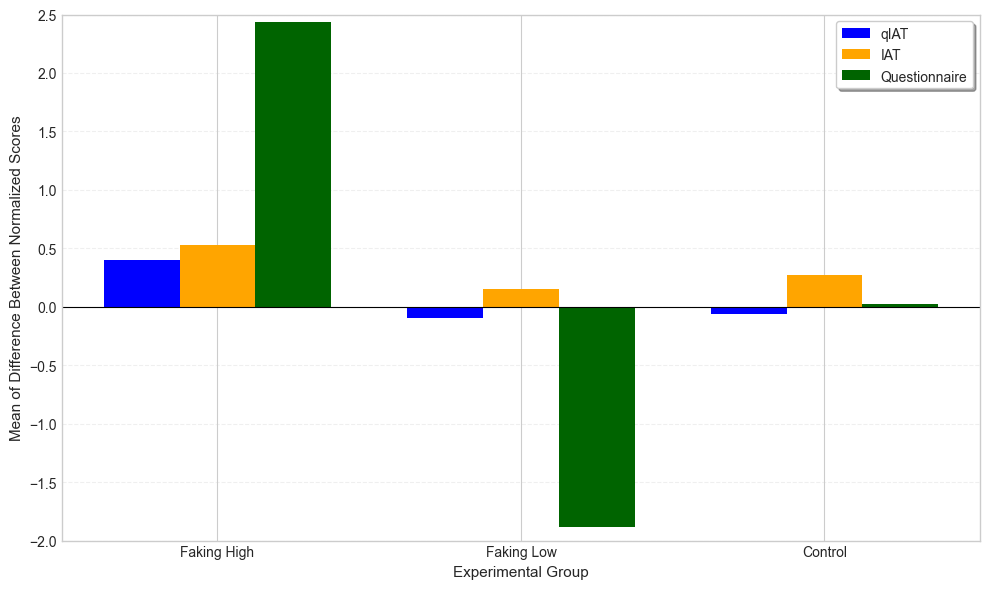


Mean Differences (T2_norm - T1_norm) by Group and Measure (Study 2):
Measure       qIAT    IAT  Questionnaire
Group                                   
Faking High  0.401  0.529          2.438
Faking Low  -0.094  0.149         -1.887
Control     -0.066  0.271          0.025


In [14]:
# Filter to Study 2
df_s2_fig5 = df_s2_fig.copy()

# Group mapping (0 = Control, 1 = Faking Low, 2 = Faking High)
group_names = {0: 'Control', 1: 'Faking Low', 2: 'Faking High'}

# Prepare data for plotting
# We need to compute normalized differences (T2_norm - T1_norm) for each measure

# 1. Questionnaire: Compute normalized scores using T1 baseline
t1_ques_all = pd.to_numeric(df_s2_fig5['t1_ques'], errors='coerce').dropna()
t1_ques_mean = t1_ques_all.mean()
t1_ques_sd = t1_ques_all.std(ddof=1)

df_s2_fig5['t1_ques_norm'] = (pd.to_numeric(df_s2_fig5['t1_ques'], errors='coerce') - t1_ques_mean) / t1_ques_sd
df_s2_fig5['t2_ques_norm'] = (pd.to_numeric(df_s2_fig5['t2_ques'], errors='coerce') - t1_ques_mean) / t1_ques_sd
df_s2_fig5['ques_diff'] = df_s2_fig5['t2_ques_norm'] - df_s2_fig5['t1_ques_norm']

# 2. IAT: Use normalized D-scores (t1_com_d_norm and t2_com_d_norm)
iat_data = df_s2_fig5[df_s2_fig5['task'].str.upper() == 'IAT'].copy()
iat_data['iat_diff'] = (pd.to_numeric(iat_data['t2_com_d_norm'], errors='coerce') - 
                        pd.to_numeric(iat_data['t1_com_d_norm'], errors='coerce'))

# 3. qIAT: Use normalized D-scores (t1_com_d_norm and t2_com_d_norm)
qiat_data = df_s2_fig5[df_s2_fig5['task'].str.upper() == 'QIAT'].copy()
qiat_data['qiat_diff'] = (pd.to_numeric(qiat_data['t2_com_d_norm'], errors='coerce') - 
                          pd.to_numeric(qiat_data['t1_com_d_norm'], errors='coerce'))

# Compute means for each group and measure
results = []

for group_num, group_name in group_names.items():
    # Questionnaire (all participants have questionnaire data)
    ques_group = df_s2_fig5[df_s2_fig5['group'] == group_num].copy()
    ques_diff_mean = ques_group['ques_diff'].dropna().mean()
    results.append({
        'Group': group_name,
        'Measure': 'Questionnaire',
        'Mean_Diff': ques_diff_mean
    })
    
    # IAT (only participants with IAT task)
    iat_group = iat_data[iat_data['group'] == group_num].copy()
    if len(iat_group) > 0:
        iat_diff_mean = iat_group['iat_diff'].dropna().mean()
        results.append({
            'Group': group_name,
            'Measure': 'IAT',
            'Mean_Diff': iat_diff_mean
        })
    
    # qIAT (only participants with qIAT task)
    qiat_group = qiat_data[qiat_data['group'] == group_num].copy()
    if len(qiat_group) > 0:
        qiat_diff_mean = qiat_group['qiat_diff'].dropna().mean()
        results.append({
            'Group': group_name,
            'Measure': 'qIAT',
            'Mean_Diff': qiat_diff_mean
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Pivot for easier plotting
pivot_df = results_df.pivot(index='Group', columns='Measure', values='Mean_Diff')
# Reorder columns: qIAT, IAT, Questionnaire
pivot_df = pivot_df[['qIAT', 'IAT', 'Questionnaire']]
# Reorder rows: Faking High, Faking Low, Control (as requested)
pivot_df = pivot_df.reindex(['Faking High', 'Faking Low', 'Control'])

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and positions
x = np.arange(len(pivot_df.index))  # Group positions
width = 0.25  # Width of bars

# Define colors: qIAT (blue), IAT (orange), Questionnaire (dark green)
colors = {'qIAT': 'blue', 'IAT': 'orange', 'Questionnaire': 'darkgreen'}

# Plot bars
bars1 = ax.bar(x - width, pivot_df['qIAT'], width, label='qIAT', color=colors['qIAT'])
bars2 = ax.bar(x, pivot_df['IAT'], width, label='IAT', color=colors['IAT'])
bars3 = ax.bar(x + width, pivot_df['Questionnaire'], width, label='Questionnaire', color=colors['Questionnaire'])

# Labels and formatting
ax.set_xlabel('Experimental Group', fontsize=11)
ax.set_ylabel('Mean of Difference Between Normalized Scores', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.set_ylim(-2.0, 2.5)

# Grid
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.axhline(y=0, color='black', linewidth=0.8)

# Legend
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("\nMean Differences (T2_norm - T1_norm) by Group and Measure (Study 2):")
print(pivot_df.round(3))
